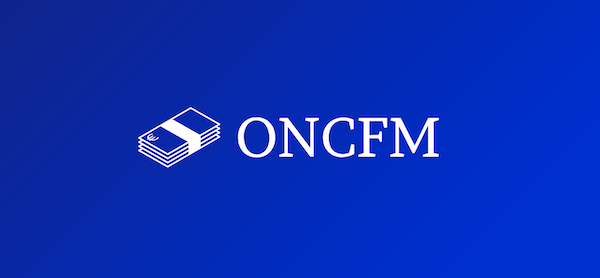

<font color="deepskyblue">

### Summary

1. Import du dataset nettoyé et complet (1500 observations, 7 colonnes)
   
2. Analyse en composantes principales
   
   2.1 Standardisation des données

   2.2 Diagramme d'éboulis de la variance expliquée

   2.3 Calcul du coefficient de corrélation

   2.4 Cercle des corrélations

   2.5 Projection des billets sur le 1er plan factoriel

3. Classification supervisée avec K-means
   
   3.1. Calcul k optimal du k-means

      a) Méthode du coude

      b) Score de Silhouette

      c) Projection des 1500 billets partitionnés par K-means

      d) Projection des clusters et ses centroïdes

   3.2 Division du jeu de données avec train-test-split

   3.3 Appliquer K-means sur notre jeu d'entrainement

   3.4 Classification sur l'échantillon test

   3.5 Projection des prédictions du test sur 1er plan factoriel

   3.6 Comparaison entre les prédictions du k-means et les données réels

   3.7 Performance du K-means - Matrice de confusion

4. Régression Logistique
   
   4.1 Scinder le dataframe avec train-test-split

   4.2 Entrainement du modèle de régression

   4.3 Significativité des variables

   4.4 Prédiction sur l'échantillon-test

   4.5 Création dataframe du résultat de la probabilité

   4.6 Performance de notre modèle de classification

   4.7 Autres scores d'évaluation de la performance

   4.8 Courbe de ROC

   4.9 Variables les plus significatives avec RFECV
5. Optimisation des performances de notre modèle avec GridSearchCV
6. Sélection du modèle final
7. Prédiction sur fichier production


</font>

********************************************************************************************************************************

### <font color="deepskyblue"> 1. Import du dataset nettoyé et complet (1500 observations et 7 colonnes)</font>

In [2]:
# utilities
import os, warnings
os.environ["OMP_NUM_THREADS"] = '1'  # needed to avoid memory leak warning with K-Means in Windows environment
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings

# ACP
from sklearn.decomposition import PCA
from sklearn import preprocessing

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Standardisation des données
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# K-Means
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

# Score des silhouettes
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score, adjusted_rand_score
# + le score des silhouettes est élevé + les clusters sont éloignés

# Regression Logistique
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import sklearn as sk
import statsmodels.formula.api as smf

In [3]:
df_final = pd.read_csv("df_final.csv")
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### <font color="deepskyblue">2. Analyse en composantes principales</font>

In [4]:
df_final = df_final.set_index("is_genuine")
df_final.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
1,172.69,104.48,103.50,4.40,2.94,113.16
1,171.36,103.91,103.94,3.62,3.01,113.51
1,171.73,104.28,103.46,4.04,3.48,112.54


- Sélection des variables numériques

In [5]:
X = df_final.values
X[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [6]:
X.shape

(1500, 6)

- Variable cible

In [7]:
is_genuine = df_final.index
len(is_genuine)

1500

In [8]:
is_genuine

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int64', name='is_genuine', length=1500)

- Features

In [9]:
features = df_final.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

#### <font color="deepskyblue">2.1 Standardisation des données numériques</font>

In [10]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.05552293, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08209165, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1264954 , -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30961456, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.6725504 ,  1.41767746,
        -0.15875038]])

In [11]:
idx = ["mean", "std"]

pd.DataFrame(X_norm).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
n_components=2
pca = PCA(n_components=n_components)
df_pca = pca.fit(X_norm)
df_pca

PCA(n_components=2)

#### <font color='deepskyblue'>2.2 Diagramme d'éboulis de la variance expliquée</font>

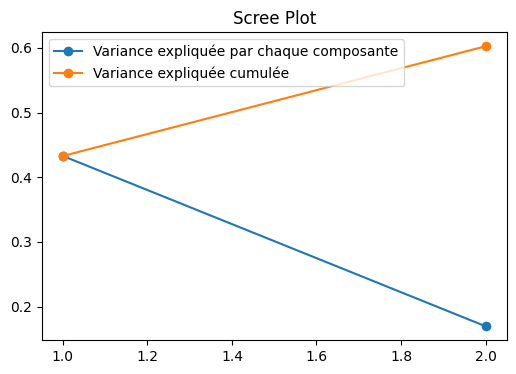

In [13]:
# Calculer la variance expliquée + variance expliquée cumulée
explained_variance = df_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot (éboulis) avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
#plt.xlabel('nb PC')
#plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

In [14]:
scree = (df_pca.explained_variance_ratio_ * 100).round(2)
scree_cum = (df_pca.explained_variance_ratio_.cumsum() * 100).round(2)

print(f'Variance expliquée : {scree}')
print(f'Variance expliquée cumulée :{scree_cum}')

Variance expliquée : [43.29 16.96]
Variance expliquée cumulée :[43.29 60.24]


<font color="coral">

- la 1ère composante capte 43% de la variance de nos données initiales

- => 60% de la variance des données est expliquée par les 2 premières composantes

</font>

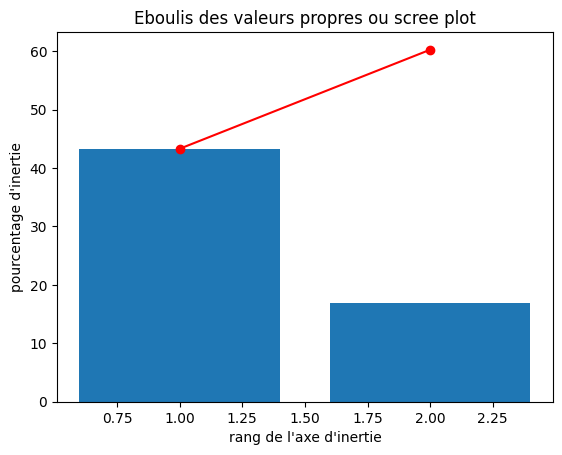

In [15]:
# nous mettons nos 2 composantes principales dans une liste
n_components = 2
x_list = range(1, n_components+1)
list(x_list)

# affichage du diagramme d'éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l\'axe d\'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres ou scree plot")
plt.show(block=False)

In [16]:
pcs = df_pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084836,0.330573,0.393608,0.507659,0.439445,-0.527037
1,0.941141,0.307847,0.108558,-0.072996,-0.004670,0.048466


In [17]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05


In [18]:
pcs.T

,F1,F2
diagonal,-0.084836,0.941141
height_left,0.330573,0.307847
height_right,0.393608,0.108558
margin_low,0.507659,-0.072996
margin_up,0.439445,-0.004670
length,-0.527037,0.048466


#### <font color="deepskyblue">2.3 Calcul du coefficient de corrélation</font>

<Axes: >

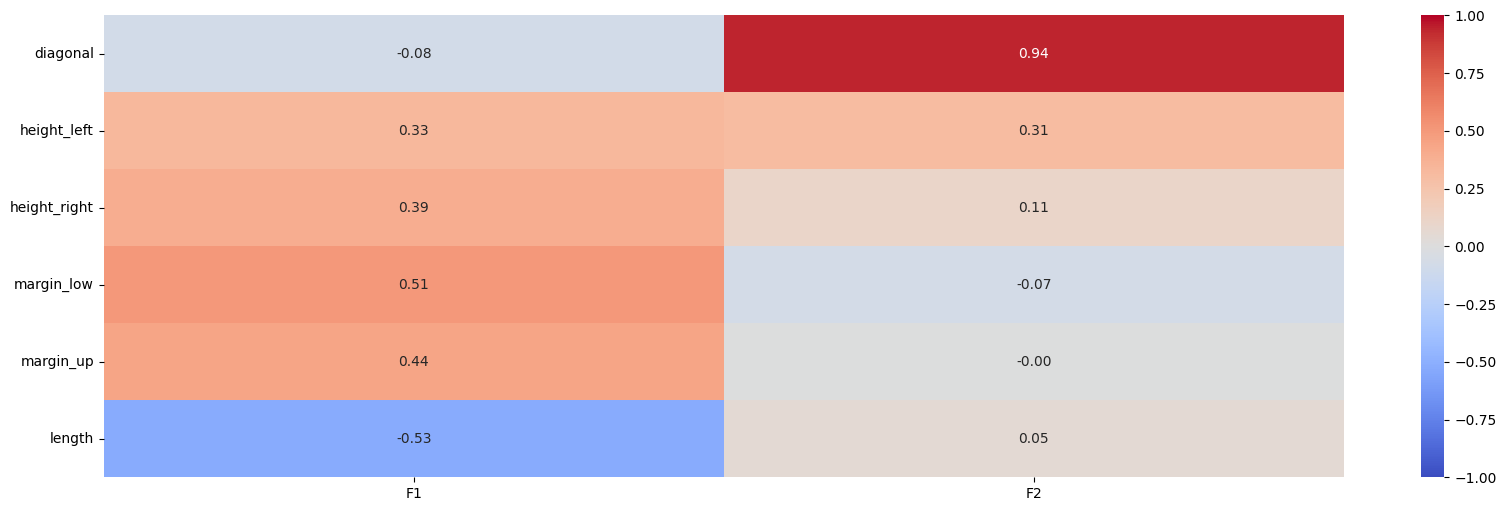

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### <font color="deepskyblue">2.4 Cercle des corrélations</font>

In [20]:
def correlation_graph(df_pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, df_pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                df_pca.components_[x, i],  
                df_pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(df_pca.components_[x, i] + 0.05,
                df_pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [21]:
x_y = (0,1)
x_y

(0, 1)

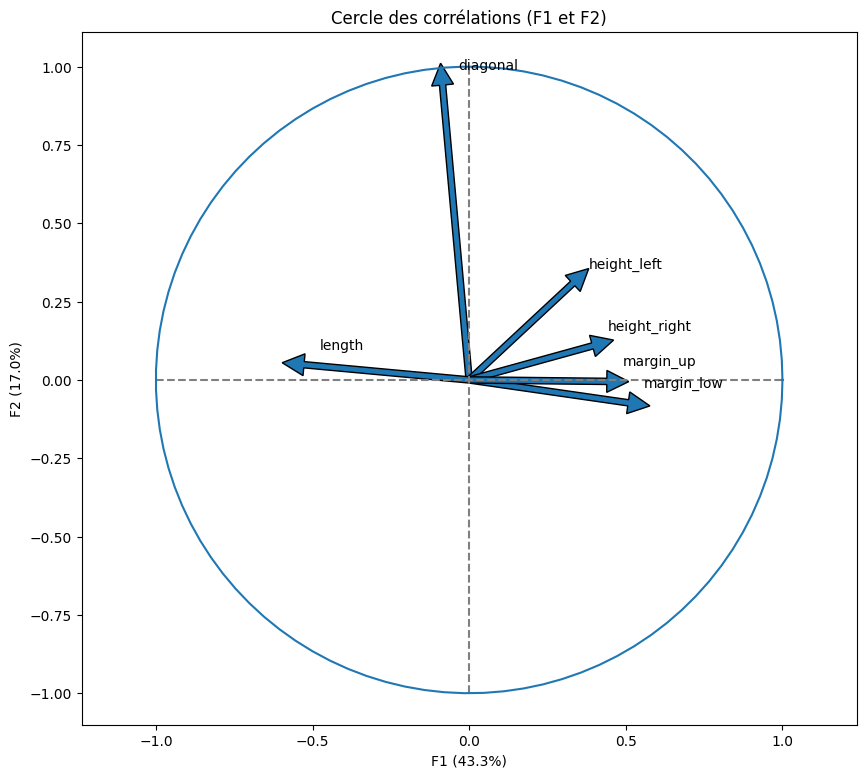

In [22]:
correlation_graph(df_pca, x_y, features)

**Lecture du cercle des corrélations**

Les variables les mieux représentées sont 'diagonal','length', 'margin_low' et 'margin_up' : nous obtenons un coefficient de corrélation d'au moins 0.5 avec nos 2 premiers axes principaux.
___

- Corrélation négative de la variable length sur le 1er axe principale
- Corrélation positive des variables margin_low et margin_up sur le 1er axe principale
- Corrélation positive de la variable diagonale avec notre 2ème composante principale

#### <font color="deepskyblue">2.5 Projection des billets sur le 1er plan factoriel</font>

In [23]:
X_proj = df_pca.transform(X_norm)
X_proj[:5]

array([[ 1.64423129,  0.74913167],
       [-2.01961846, -2.20778776],
       [-0.97032292,  2.61999912],
       [-1.37719988, -1.81775965],
       [ 0.14874304, -0.56584768]])

In [24]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'bright')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

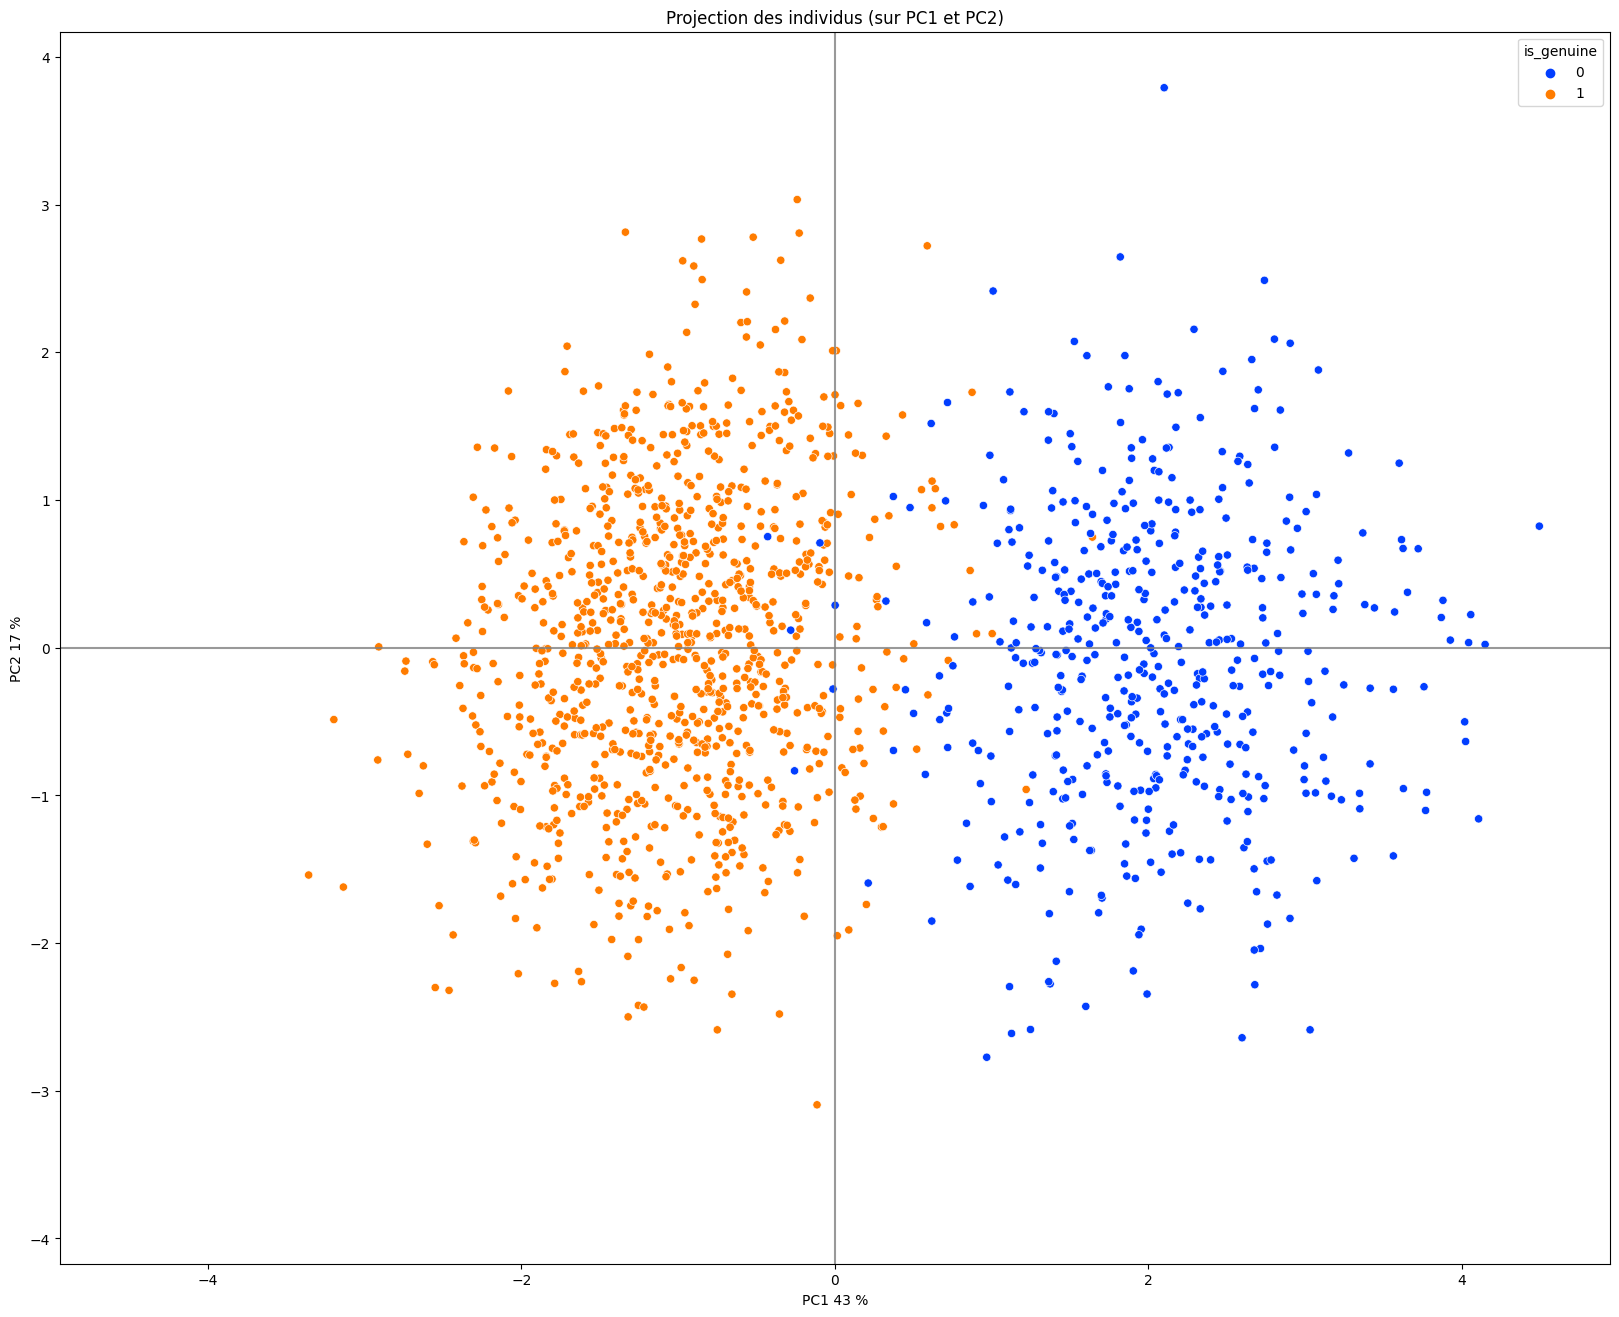

In [25]:
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=df_final.index, marker="o")

On constate que l'on distingue bien nos 2 groupes (vrai billets et faux billets) sur nos 2 premières composantes !
___
- Les vrais billets se concentrent sur le coté gauche
- Les faux billets se concentrent sur le coté droit
- Nous voyons une zone "d'incertitude" qui est la zone de contact entre les 2 groupes
___
Les billets sont mieux distingués via leur longueur (length), car c'est cette variable qui est la mieux représentée sur l'axe des abscisses !

** fin ACP **

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<font color="deepskyblue"> 2. Regression Logistique</font>

In [26]:
rl = df_final.copy()

In [27]:
rl = df_final.reset_index('is_genuine')

In [28]:
# include all variables
X = rl[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
y = rl[['is_genuine']]

banknote = rl.columns.drop('is_genuine')

In [29]:
X.shape

(1500, 6)

In [30]:
y.head()

,is_genuine
0,1
1,1
2,1
3,1
4,1


In [31]:
banknote

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

- Split, train, test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape}")
unique_yt, counts_yt = np.unique(y_train, return_counts=True)
print("True/False mix in training set:\n", np.asarray((unique_yt, counts_yt)).T)
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape}")
unique_ytt, counts_ytt = np.unique(y_test, return_counts=True)
print("True/False mix in testing set:\n", np.asarray((unique_ytt, counts_ytt)).T)

Nous avons X_train de forme (1200, 6) et y_train de forme (1200, 1)
True/False mix in training set:
 [[  0 390]
 [  1 810]]
Nous avons X_test de forme (300, 6) et y_test de forme (300, 1)
True/False mix in testing set:
 [[  0 110]
 [  1 190]]


<font color="lightblue">

Comme notre jeu de données a 1500 échantillons et que l'on en réserve 20 % pour le test, on aura les tailles suivantes : X.shape()  et  y.shape()

Pour t = 0,2

- X_train: 1200 * 6

- X_test: 300 * 6

- y_train: 1200 * 1

- y_test: 300 * 1

</font>

- Enregistrement de nos jeux de test et d'entrainement pour ré-utilisation pour notre modèle de régression logistique

In [34]:
# export training & testing sets to re-use for training logistic regression model
pd.DataFrame(X_train, columns=banknote).to_csv('X_train.csv', index=None)
y_train.to_csv('y_train.csv', index=False)
pd.DataFrame(X_test, columns=banknote).to_csv('X_test.csv', index=None)
y_test.to_csv('y_test.csv', index=False)

In [35]:
# center & reduce data
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)

- Initialisation et entrainement

In [36]:
clf = LogisticRegression(random_state=808).fit(X_train, y_train)

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Coef des variables
temp_coef = pd.DataFrame(clf.coef_[0], index=banknote, columns=['coef'])
print(temp_coef)

                  coef
diagonal     -0.291817
height_left  -1.460221
height_right -1.985041
margin_low   -3.319429
margin_up    -3.002789
length        3.870290


Ici le coefficient nous permet de savoir quelles variables sont le plus significatives pour la prédiction des résultats !
___
- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moins significative est "diagonal"

- Prédictions d'échantillons

In [38]:
X.shape

(1500, 6)

In [39]:
# Prediction d'un échantillon
print("Prédiction",clf.predict([x_train_scaled[8, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[8, :]])[0][0])

Prédiction 1
Probabilité 0.0099838586953378


on obtient True avec une probabilité de 0.99%

In [40]:
# Prediction d'un échantillon
print("Prédiction",clf.predict([x_train_scaled[89, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[89, :]])[0][1])

Prédiction 0
Probabilité 0.005193715358715791


on obtient False avec une probabilité de 0.5%

In [41]:
# Prediction d'un autre échantillon
print("Prédiction",clf.predict([x_train_scaled[13, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[13, :]])[0][1])

Prédiction 1
Probabilité 0.9998171248970038


on obtient True avec une probabilité de 99.98%

- Histogramme des probabilités des prédictions

<Axes: ylabel='Count'>

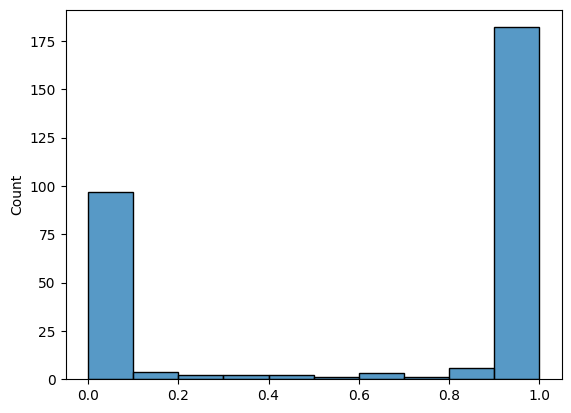

In [42]:
y_hat_proba = clf.predict_proba(X_test)[:,1]
sns.histplot(y_hat_proba)

Notre modèle est assez confiant de ses prédictions, la plupart des prédictions ont une probabilité proche de 0 ou de 1

- Accuracy

In [43]:
# predictions 
y_pred = clf.predict(X_test)

print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.99


Notre modèle a une efficacité de 99%, ce qui est une trés belle performance ! 

- Matrice de confusion

In [44]:
confusion_matrix(y_test, y_pred)

array([[107,   3],
       [  0, 190]], dtype=int64)

- Seuil de séparation des classes

comparons la matrice de confusion pour différents seuils de classification

In [45]:
# Probabilité de la classe 1
y_hat_proba = clf.predict_proba(X_test)[:,1]

In [46]:
# classes prédites pour les  seuils 0.3 et 0.7

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [47]:
# Matrice de confusion pour le seuil 0.3
confusion_matrix(y_test, y_pred_03)

array([[103,   7],
       [  0, 190]], dtype=int64)

<font color="lightgreen">

Nous obtenons un excellent résultat !

seuil = 30%

Nous obtenons 0 faux négatifs et 7 faux positif !

</font>

In [48]:
# Matrice de confusion pour le seuil 0.7

confusion_matrix(y_test, y_pred_07)

array([[109,   1],
       [  2, 188]], dtype=int64)

<font color="lightgreen">

Nous obtenons un excellent résultat !

seuil = 70%

Nous obtenons 2 faux négatifs et 1 faux positif !

</font>

- Autres Métriques :

    - Precision, Recall, et ROC_AUC

In [49]:
# Rapport de classification

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [50]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Precision: 0.9844559585492227
Recall: 1.0
ROC-AUC 0.9996650717703349


<font color="lightblue">

- Les scores des mesures d'évaluation de la performance de notre modèle de classification binaire sont excellents ! 

    - Precision : 98.4% des prédictions positives faites par le modèle sont correctes.

    - Rappel : 100% des vrais positifs dans les données sont identifiés par notre modèle !

    - ROC-AUC de 99,9% indique une excellente capacité de discrimination entre les classes positives et négatives.

</font>

- Courbe ROC => Graphique de la sensibilité (taux de vrais positifs) par rapport à la spécificité (taux de faux positifs) pour différents seuils de classification

    - l'aire sous la courbe est extrêmement proche de 1, ce qui indique que notre modèle a une capacité parfaite à distinguer les billets vrais et les billets faux.

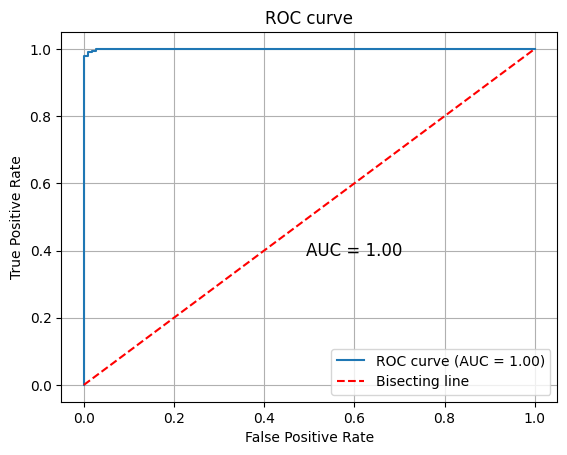

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf is your classifier, X_test is your test data, and y_test is your test labels
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Calcul de l'AUC
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')

# Tracer la bissectrice en rouge
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Bisecting line')

# Ajout des indicateurs
plt.text(0.6, 0.4, f'AUC = {auc:.2f}', fontsize=12, ha='center', va='center')

# Personnalisation du graphique
plt.grid()
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


----------------- Fin régression Logistique --------------------------------

<font color="deepskyblue">

3.1 Clustering & analyse des centroides avec K-means

</font>

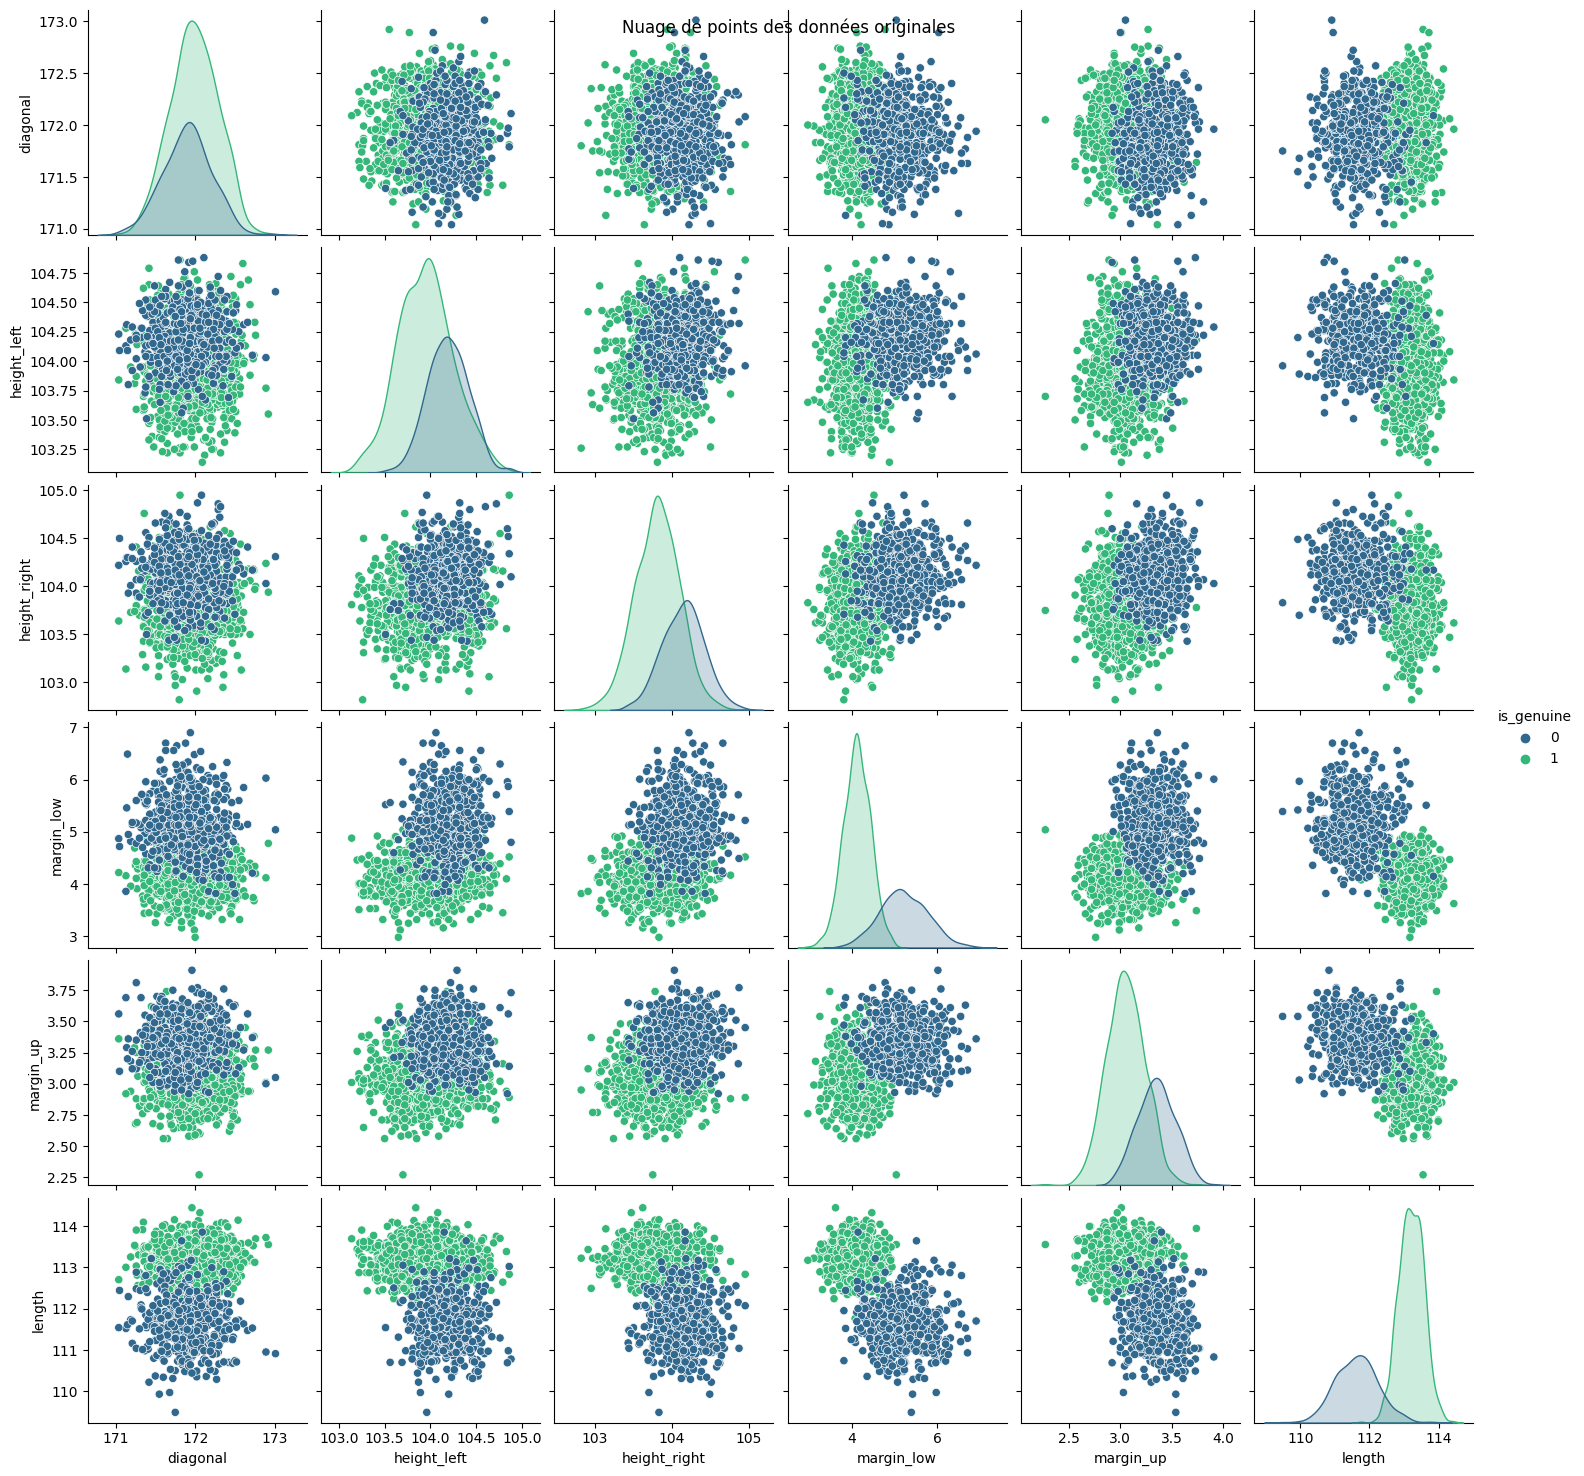

In [52]:
# Visualisation avec Seaborn
sns.pairplot(rl, hue='is_genuine', palette='viridis')
plt.suptitle('Nuage de points des données originales')
plt.show()




<font color="deepskyblue">3.2 Création d'un dataframe "clustering" à partir du jeu d'entrainement "y_train" de notre régression logistique

- dimensions : 1200 lignes et 6 colonnes

- données : normalisées

</font>

In [53]:
clustering = pd.DataFrame(y_train)
clustering[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
          'length']] = x_train_scaled
clustering['is_genuine'].value_counts()

is_genuine
1    810
0    390
Name: count, dtype: int64

- 2 clusters se distinguent dans la relation margin_low et length

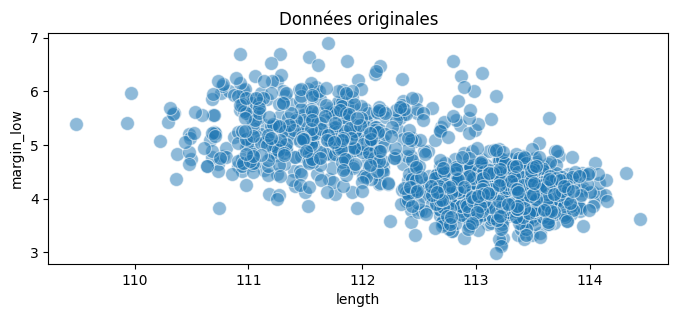

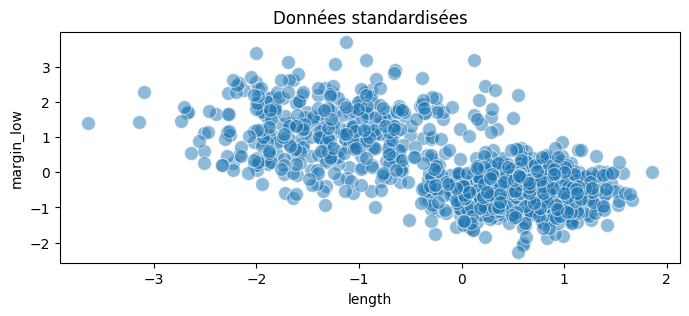

In [54]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_final, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données originales')
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données standardisées')
plt.show()

=> la répartition entre données originales et données normalisées est trés semblable.

In [55]:
clustering = clustering.set_index('is_genuine')
clustering.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,1.050853,1.958416,-0.367712,-0.597273,-0.306118,0.648529
1,-0.185700,1.559864,-1.317963,-0.597273,-1.428167,0.921625
0,-1.064303,0.995247,2.115204,0.618912,0.859087,-0.603164
0,0.334954,0.829184,1.195606,1.728680,0.513841,-1.229011
1,0.465117,1.294162,-0.980777,-0.445250,-1.126077,0.716803


### <font color="deepskyblue"> 3. Classification supervisée avec K-means</font>

#### <font color="deepskyblue">3.1 Calculer k optimal du KMeans</font>

- On utilise 2 méthodes pour trouver le nombre de cluster optimal :

    - la méthode du coude
    
    - le score de silhouette

##### a) Méthode du coude

In [56]:
# liste vide pour stocker nos inertie et score
inertia = []
sil_score = []

In [57]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
k_list = range(1, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  k_means = KMeans(n_clusters=i, n_init='auto')
  k_means.fit(X_norm) 
  inertia.append(k_means.inertia_)


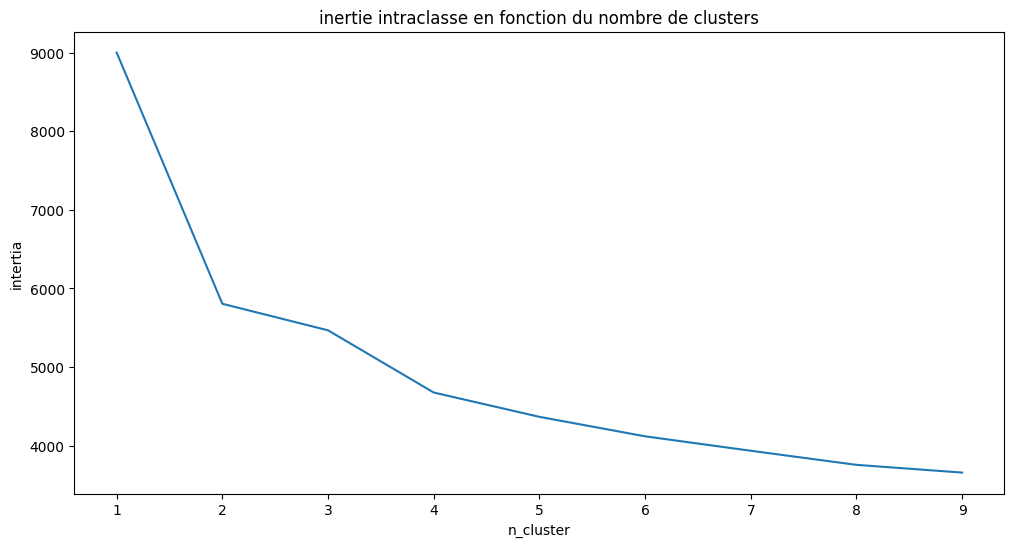

In [58]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [59]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
ks_list = range(2, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in ks_list :
  k_means = KMeans(n_clusters=i, n_init=10)
  k_means.fit(X_norm) 
  sil_score.append(silhouette_score(X_norm, k_means.labels_))

In [60]:
print(f"l'inertie : ", inertia)
print(f"silhouette score: ", sil_score)

l'inertie :  [8999.999999999996, 5805.025992488081, 5467.300822856125, 4676.201622511055, 4366.813887570258, 4119.026921902295, 3935.493580021773, 3756.0826046345187, 3657.863754228764]
silhouette score:  [0.3427417097717482, 0.20963046812677547, 0.1966679018268582, 0.15656362490843592, 0.15115794657409967, 0.14620641652091845, 0.14311873036128706, 0.13950308775730272]


##### b) Score de Silhouette


n_clusters 2
score k-means -5805.026596797172
silhouette_score:  0.3425575415231918

n_clusters 3
score k-means -5103.148636675263
silhouette_score:  0.20935293849488237

n_clusters 4
score k-means -4680.252849217829
silhouette_score:  0.19574877528564172

n_clusters 5
score k-means -4360.200851965384
silhouette_score:  0.15685773528927915

n_clusters 6
score k-means -4185.443546205042
silhouette_score:  0.15319517912057729

n_clusters 7
score k-means -3962.0409717483426
silhouette_score:  0.14343331821222857


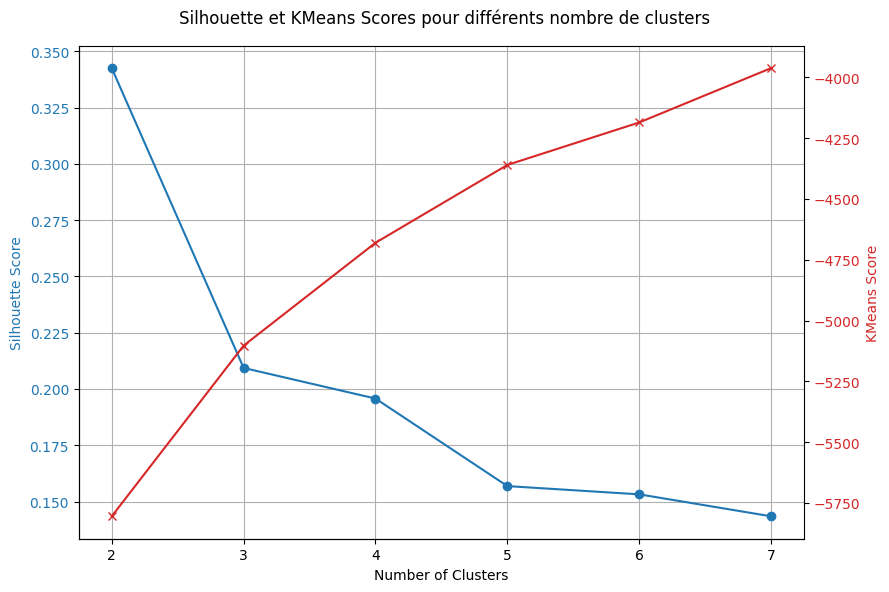

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_norm is already defined and preprocessed

silhouette_scores = []
kmeans_scores = []

# Loop over the range of clusters to evaluate KMeans
for n_clusters in range(2, 8):
    print()
    print("n_clusters", n_clusters)
    
    k_means = KMeans(init="k-means++", n_clusters=n_clusters, random_state=808, n_init='auto')
    k_means.fit(X_norm)
    
    score = k_means.score(X_norm)
    print("score k-means", score)
    
    k_means_labels = k_means.predict(X_norm)
    silhouette_avg = silhouette_score(X_norm, k_means_labels)
    print("silhouette_score: ", silhouette_avg)
    
    silhouette_scores.append(silhouette_avg)
    kmeans_scores.append(score)

# Plotting silhouette scores and KMeans scores
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting silhouette scores
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(range(2, 8), silhouette_scores, marker='o', color=color, label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid()

# Creating a second y-axis for KMeans scores
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('KMeans Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2, 8), kmeans_scores, marker='x', color=color, label='KMeans Score')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
fig.suptitle('Silhouette et KMeans Scores pour différents nombre de clusters')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<font color='lightblue'>Le choix optimal du nombre de clusters est souvent un équilibre entre avoir un silhouette score élevé et une inertie plus faible. Cependant, des silhouette scores significativement plus bas indiquent une moins bonne séparation des clusters.

Sélection : 

<font color="coral">n_clusters = 2</font>

car :

Il a le meilleur silhouette score (0.3426), indiquant des clusters bien définis.
Bien que l'inertie soit plus élevée par rapport aux autres options, le compromis sur la qualité des clusters est mieux respecté avec un score de silhouette plus élevé.


Alternative possible : n_clusters = 3 pour une légère amélioration de la réduction de l'inertie, mais avec un silhouette score encore raisonnablement bon (0.2094). 
Néanmoins, on note que la qualité des clusters commence à diminuer plus rapidement à partir de ce point.

En résumé, "n_clusters = 2" offre la meilleure qualité de clustering selon le silhouette score, malgré une inertie plus élevée.</font>

In [62]:
df_final = df_final.reset_index('is_genuine')
target = df_final['is_genuine']

# Transformer les valeurs de y
target = target.replace({1: True, 0: False})

target

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool

##### <font color='deepskyblue'>c) Projection des clusters partitionnés par le K-means</font>

(1500, 7)


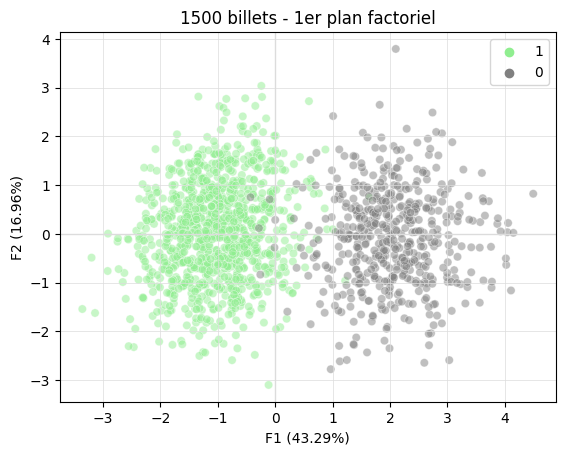

In [63]:
# Import data & split file
data = pd.read_csv("df_final.csv")

print(data.shape)

x = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values

# center & reduce data
std_scaler = StandardScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)

# run K-means
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)
kmeans_2.fit(x_scaled)

# run PCA
pca_kmeans = PCA(n_components=2, random_state=42)
pca_kmeans.fit(x_scaled)
x_proj = pca_kmeans.transform(x_scaled)

# Plot clusters in 1st factorial plane
x_proj = pd.DataFrame(x_proj, columns=["PC1", "PC2"])
fig, ax = plt.subplots(1, 1)
scatter1 = sns.scatterplot(data=x_proj, x="PC1", y="PC2", hue=data['is_genuine'], palette=['lightgreen','gray'],
                           hue_order=[1, 0], alpha=0.5)
ax.set_xlabel('F{} ({}%)'.format(1, round(100*pca_kmeans.explained_variance_ratio_[0], 2)))
ax.set_ylabel('F{} ({}%)'.format(2, round(100*pca_kmeans.explained_variance_ratio_[1], 2)))

# Plot thicker abscissa and ordinate lines
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')
plt.legend(title='')
ax.set_title("1500 billets - 1er plan factoriel")
plt.grid(axis='both', color='gainsboro', lw=0.5)
plt.savefig("1500_billets.png", bbox_inches='tight')
plt.show()


##### <font color='deepskyblue'>d) Projection des clusters avec ses centroïdes</font>

(1200, 6)
(1200,)


C:\Users\nbous\AppData\Local\Temp\ipykernel_22048\3505986077.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_proj.iloc[:, 0], x_proj.iloc[:, 1], cmap='viridis', alpha=0.5)
c:\Python311\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


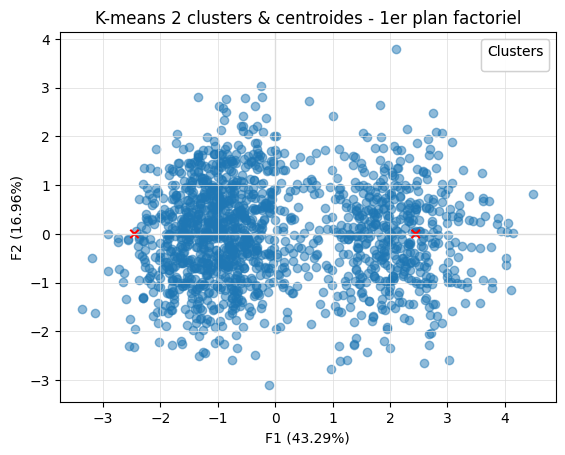

In [64]:
X_km = clustering.values
y_km = clustering.index

print(X_km.shape)
print(y_km.shape)

n_clusters=2
k_means = KMeans( n_clusters=n_clusters, random_state = 808, n_init = 'auto')
k_means.fit(X_norm)

labels_km = k_means.labels_
labels_km

centroids_km = k_means.cluster_centers_
centroids_km = pd.DataFrame(centroids_km)
centroids_km.columns = banknote
centroids_km


# plot clusters in 1st factorial plane
pca_kmeans = PCA(n_components=2, random_state=42)
pca_kmeans.fit(X_norm)

x_proj = pca_kmeans.transform(X_norm)
x_proj = pd.DataFrame(x_proj, columns=["PC1", "PC2"])

# use initialised scaler
centroids_km_scaled = std_scaler.fit_transform(centroids_km)

# use initialised acp
centroids_proj = pca_kmeans.fit_transform(centroids_km_scaled)

# create dataframe
centroids_proj = pd.DataFrame(centroids_proj,
                                columns=["F1", "F2"],
                                index=["cluster_0", "cluster_1"])

# plot results
fig, ax = plt.subplots(1, 1)
scatter = ax.scatter(x_proj.iloc[:, 0], x_proj.iloc[:, 1], cmap='viridis', alpha=0.5)
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1], marker="x",
           c=['red', 'red'])

ax.set_xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0], 2)))
ax.set_ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1], 2)))

# plot thicker abscissa and ordinate lines
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')

# produce a legend with the unique colors from the scatter
legend_1 = ax.legend(*scatter.legend_elements(),
                     loc="upper right", title="Clusters")
ax.add_artist(legend_1)

ax.set_title("K-means 2 clusters & centroides - 1er plan factoriel")
plt.grid(axis='both', color='gainsboro', lw=0.5)
plt.savefig("Kmeans 2 clusters & centroides - 1er plan factoriel.png", bbox_inches='tight')
plt.show()

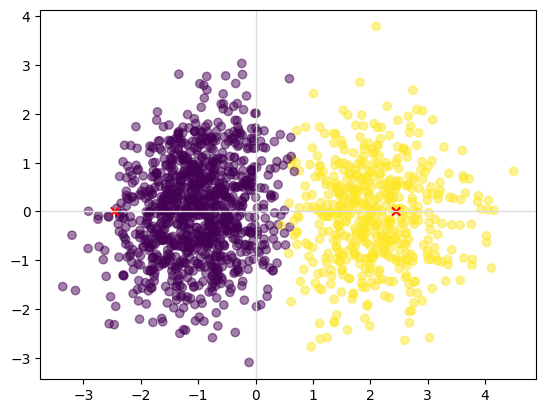

In [65]:
n_clusters = 2  
k_means = KMeans(n_clusters=n_clusters, random_state=808, n_init='auto')
k_means.fit(X_norm)

labels_km = k_means.labels_

centroids_km = k_means.cluster_centers_
centroids_km = pd.DataFrame(centroids_km)
centroids_km.columns = banknote

# plot clusters in 1st factorial plane
pca_kmeans = PCA(n_components=2, random_state=42)
pca_kmeans.fit(X_norm)

x_proj = pca_kmeans.transform(X_norm)
x_proj = pd.DataFrame(x_proj, columns=["PC1", "PC2"])

# use initialised scaler
centroids_km_scaled = std_scaler.fit_transform(centroids_km)

# use initialised acp
centroids_proj = pca_kmeans.fit_transform(centroids_km_scaled)

# create dataframe
centroids_proj = pd.DataFrame(centroids_proj,
                                columns=["F1", "F2"],
                                index=["cluster_0", "cluster_1"])  # Adjust index for 2 clusters

# plot results
fig, ax = plt.subplots(1, 1)
scatter = ax.scatter(x_proj.iloc[:, 0], x_proj.iloc[:, 1], c=labels_km, cmap='viridis', alpha=0.5)  # Use labels_km for color
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1], marker="x",
           c=['red', 'red'])  # Adjust color for 2 clusters

#ax.set_xlabel('F{} ({}%)'.format(1, round(100*pca_kmeans.explained_variance_ratio_[0], 2)))  # Update pca_kmeans variable
#ax.set_ylabel('F{} ({}%)'.format(2, round(100*pca_kmeans.explained_variance_ratio_[1], 2)))  # Update pca_kmeans variable

# plot thicker abscissa and ordinate lines
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')

# produce a legend


TRAINING ET TESTING DE L'ALGORITHME DE CLASSIFICATION AVEC KMEANS NOTEBOOK "kmeans_predictive_model"

#### <font color='deepskyblue'>3.2 train-test-split : Séparation des données d'entrainement et des données test !</font>

In [66]:
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(X_norm, target, test_size=0.2, random_state=808)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1200 lignes 
y_train : 1200 lignes 
X_test : 300 lignes 
y_test : 300 lignes


#### <font color="deepskyblue">3.3 On définit le nombre de cluster à 2 et on entraine !</font>

In [67]:
from sklearn.cluster import KMeans

# On définit le nombre de cluster à 2 et on entraine !
k_means = KMeans(n_clusters=2, random_state=808, n_init="auto").fit(X_train, y_train)

#### <font color="deepskyblue">3.4 Prédictions K-means sur l'échantillon test</font>

In [68]:
# Prédictions sur l'échantillon-test

y_kmean = k_means.predict(X_test)
y_kmean[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [69]:
y_test

480      True
141      True
103      True
1499    False
787      True
        ...  
92       True
1055    False
1330    False
330      True
208      True
Name: is_genuine, Length: 300, dtype: bool

In [70]:
y_test = y_test.replace([False, True], [2, 1]).reset_index()
#y_test = pd.DataFrame(y_test)
y_test

,index,is_genuine
0,480,1
1,141,1
2,103,1
3,1499,2
4,787,1
...,...,...
295,92,1
296,1055,2
297,1330,2
298,330,1


In [71]:
ytest = y_test['is_genuine']
ytest

0      1
1      1
2      1
3      2
4      1
      ..
295    1
296    2
297    2
298    1
299    1
Name: is_genuine, Length: 300, dtype: int64

#### <font color="deepskyblue">3.5 Projection des prédictions du test sur notre 1er plan factoriel</font>

In [72]:
data_acp_kmeans = pca.fit_transform(X_test)
df_acp_kmeans = pd.DataFrame(data_acp_kmeans)
df_acp_kmeans.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
# Sélectionner uniquement les colonnes PC1 et PC2
df_acp_kmeans = df_acp_kmeans[['PC1', 'PC2']]

df_acp_kmeans


,PC1,PC2
0,-2.433005,-0.215682
1,0.106468,-1.211441
2,-0.908570,0.388378
3,0.923689,-1.462388
4,-0.748761,0.834227
...,...,...
295,-1.258090,-0.312323
296,1.918895,-0.744672
297,2.169851,-0.098839
298,-0.798765,0.350215


Dataframe du K-means

In [73]:
# Dataframe du K-Means

df_kmeans = df_acp_kmeans
df_kmeans['cluster'] = y_kmean
df_kmeans

,PC1,PC2,cluster
0,-2.433005,-0.215682,1
1,0.106468,-1.211441,1
2,-0.908570,0.388378,1
3,0.923689,-1.462388,0
4,-0.748761,0.834227,1
...,...,...,...
295,-1.258090,-0.312323,1
296,1.918895,-0.744672,0
297,2.169851,-0.098839,0
298,-0.798765,0.350215,1


In [74]:
# Création du dataframe des centroïdes
df_centroide_kmeans = df_kmeans.groupby('cluster').mean()
df_centroide_kmeans = df_centroide_kmeans.reset_index()
df_centroide_kmeans['cluster'] = df_centroide_kmeans['cluster'].replace([0, 1], 'centroide')
df_centroide_kmeans

,cluster,PC1,PC2
0,centroide,1.910581,-0.142283
1,centroide,-1.090332,0.081198


- Concaténation des 2 dataframes

In [75]:
df_kmeans = pd.concat([df_kmeans, df_centroide_kmeans], ignore_index = True)
df_kmeans

,PC1,PC2,cluster
0,-2.433005,-0.215682,1
1,0.106468,-1.211441,1
2,-0.908570,0.388378,1
3,0.923689,-1.462388,0
4,-0.748761,0.834227,1
...,...,...,...
297,2.169851,-0.098839,0
298,-0.798765,0.350215,1
299,-0.505961,-1.259244,1
300,1.910581,-0.142283,centroide


Visualisation des clusters des prédictions du set test

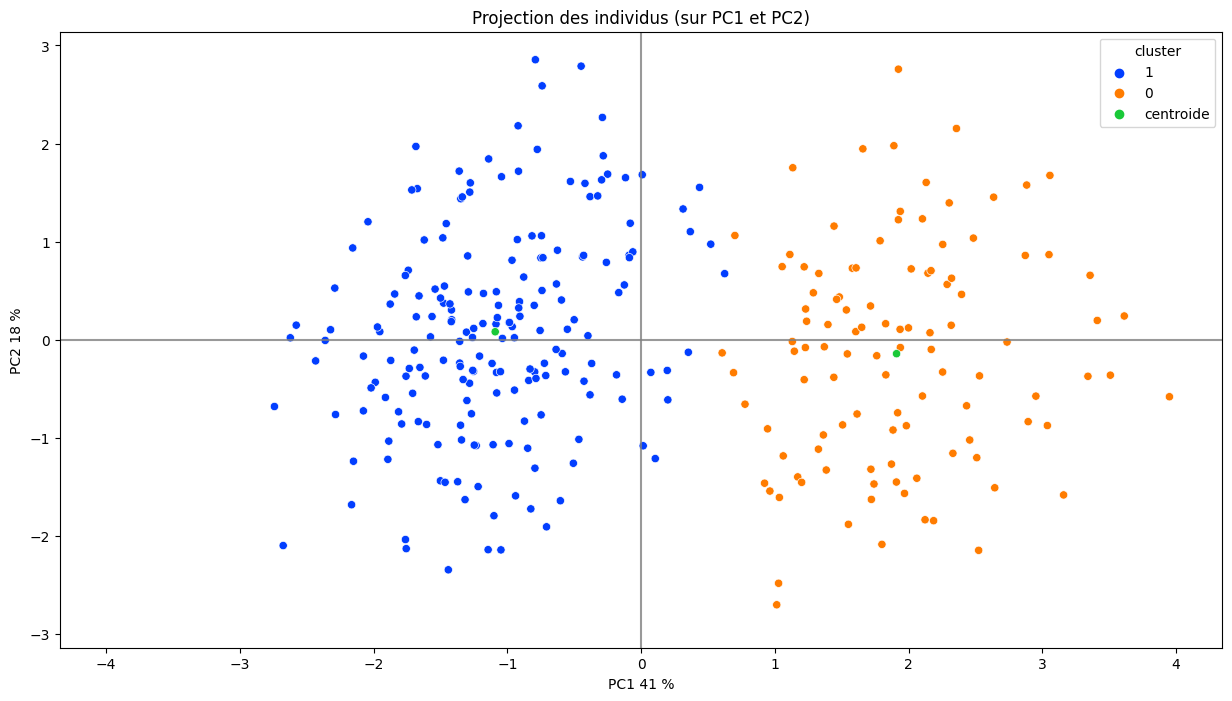

In [76]:
x_y = [0,1]
display_factorial_planes(df_kmeans, x_y, pca, figsize=(15,8), clusters=df_kmeans.cluster, marker="o")

On distingue mieux nos 2 groupes sur nos 2 premières composantes !
___
- Les centroides crée par le K-Means sont proches de ceux des données d'origines
- Les groupes sont très similaires à ceux des données d'origines
- La zone "d'incertitude" n'éxiste plus ! On voit une limite entre les 2 groupes !

-------------------------------------

#### <font color="deepskyblue">3.6 Comparaison des clusters du K-means avec les clusters réels</font>


In [77]:
# Suppression des centroides pour comparer les groupes de base aux groupes crée par le K-Means

df_kmeans.drop(df_kmeans.loc[df_kmeans['cluster']=='centroide'].index, inplace=True)
df_kmeans['cluster'] = df_kmeans['cluster'].replace([0], [2])
df_kmeans['is_genuine'] = ytest
df_kmeans

,PC1,PC2,cluster,is_genuine
0,-2.433005,-0.215682,1,1
1,0.106468,-1.211441,1,1
2,-0.908570,0.388378,1,1
3,0.923689,-1.462388,2,2
4,-0.748761,0.834227,1,1
...,...,...,...,...
295,-1.258090,-0.312323,1,1
296,1.918895,-0.744672,2,2
297,2.169851,-0.098839,2,2
298,-0.798765,0.350215,1,1


#### <font color="deepskyblue">3.7 Matrice de confusion

- Rapport des performances

</font>

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = metrics.confusion_matrix(a, b)
    group_names = ['Vrais négatifs', 'Faux positifs', 'Faux négatifs', 'Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten() / np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(nom_graphique)
    plt.show()
    
    classification = metrics.classification_report(a, b)
    print(classification)

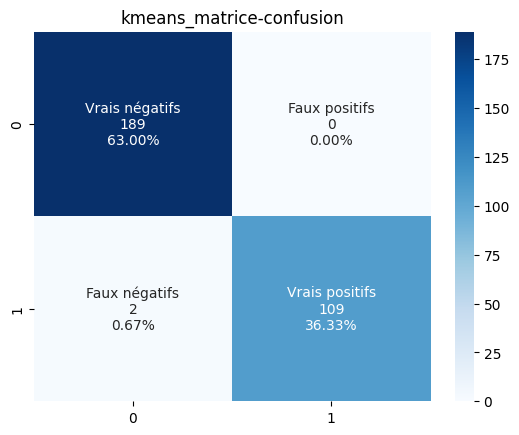

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       189
           2       1.00      0.98      0.99       111

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [79]:
matrice_confusion(df_kmeans['is_genuine'], df_kmeans['cluster'], 'kmeans_matrice-confusion')

_____________

<font color="lightblue">La matrice de confusion nous donne les performances de classification du K-Means sur le jeu de test

- 298 billets sur 300 billets au total ont été bien classés ! 

<strong>Excellent résultats 👍!</strong>
___
Exactitude élevée (accuracy) : Une exactitude de 99% montre que le modèle est globalement très précis, faisant seulement 1% d'erreurs sur l'ensemble de test.</font>

------------------------------------------------------------

### <font color="deepskyblue">4. Régression Logistique</font>

In [80]:
# Transformer les valeurs de la colonne is_genuine
df_final['is_genuine'] = df_final['is_genuine'].replace({1: True, 0: False})

# Afficher le DataFrame modifié
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


#### <font color="deepskyblue">4.1 train-test-split

- seuil de 20%

</font>

In [109]:
# y est la variable à prédire !
target = df_final['is_genuine']
#print(target)
# Création du Train_set et du Test_set

X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=42)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1200 lignes 
y_train : 1200 lignes 
X_test : 300 lignes 
y_test : 300 lignes


- environs 2/3 des données pour l'entrainement
- environs 1/3 des données pour le test

#### <font color='deepskyblue'>4.2 Entrainement de notre modèle</font>

In [110]:
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

#### <font color='deepskyblue'>4.3 Significativité des variables</font>

In [111]:
# Coef des variables
temp_coef = pd.DataFrame(regression.coef_[0], index=banknote, columns=['coef'])
print(temp_coef)

                  coef
diagonal      0.075331
height_left  -0.475550
height_right -0.684748
margin_low   -2.556231
margin_up    -1.556347
length        3.516408


- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moins significative est "diagonal"

#### <font color='deepskyblue'>4.4 Prédictions sur l'échantillon-test</font>

In [112]:
y_log = regression.predict(X_test)
y_log[:5]

array([False, False,  True,  True,  True])

In [131]:
y_log_train = regression.predict(X_train)
y_log_train[:5]

array([ True,  True, False, False,  True])

#### <font color="deepskyblue">4.5 Dataframe du résultat de la probabilité</font>

In [113]:
proba_result = pd.DataFrame(regression.predict_proba(X_test)).rename(columns={0: 'False', 1: 'True'})
proba_result

,False,True
0,0.999516,0.000484
1,0.997966,0.002034
2,0.001380,0.998620
3,0.002931,0.997069
4,0.000167,0.999833
...,...,...
295,0.000033,0.999967
296,0.006414,0.993586
297,0.999981,0.000019
298,0.913190,0.086810


<Axes: ylabel='Count'>

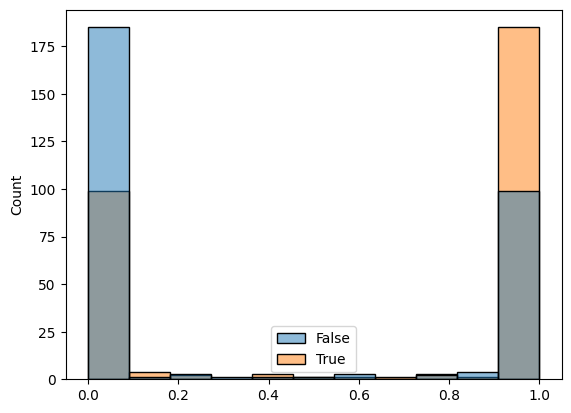

In [118]:
#y_hat_proba = regression.predict_proba(X_test)[:,1]
sns.histplot(proba_result)

In [119]:
# Billets dont la probabilité est située entre un seuil de 10% et 90%
billets_confu = proba_result.loc[(proba_result['True'] > 0.10) & (proba_result['True'] < 0.90)]
billets_confu

,False,True
22,0.400682,0.599318
26,0.800825,0.199175
29,0.629203,0.370797
100,0.206497,0.793503
103,0.626863,0.373137
162,0.813987,0.186013
188,0.266255,0.733745
192,0.618105,0.381895
222,0.243887,0.756113
230,0.844646,0.155354


La régression logistique nous permet d'avoir pour chaque billet, les probabilités que le billet soit vrai ou faux

#### <font color="deepskyblue">4.6 Performance de notre modèle de classification

- Matrice de confusion
- Rapport des performances

</font>

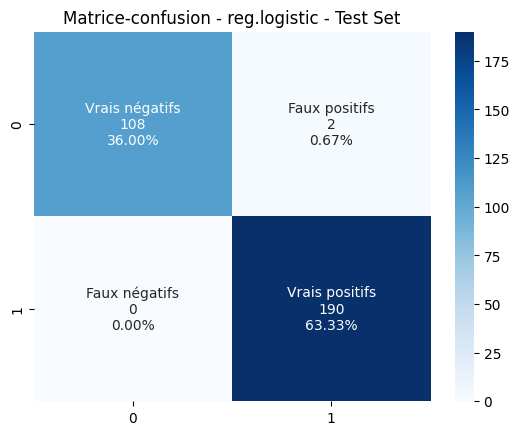

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [123]:
matrice_confusion(y_test, y_log, 'Matrice-confusion - reg.logistic - Test Set')

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**Accuracy : 99% de prédictions correctes !**

- Score de 288 sur 289 billets vrais identifiés comme vrais positifs !
- Score de 158 billets sur 161 billets faux identifiés comme vrais négatifs !

Nous obtenons une précision de 99% et un rappel de 98% sur les faux billets. 

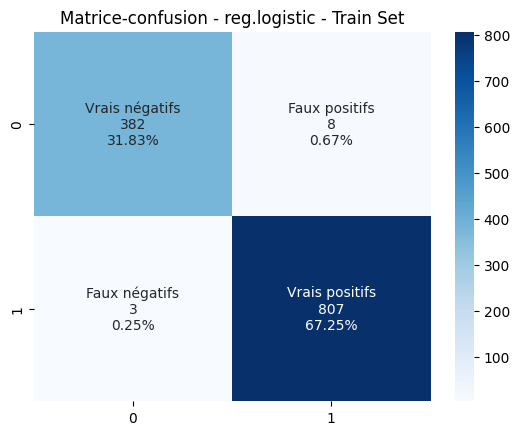

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       390
        True       0.99      1.00      0.99       810

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [132]:
matrice_confusion(y_train, y_log_train, 'Matrice-confusion - reg.logistic - Train Set')

#### <font color="deepskyblue">4.7 Autres scores pour comparer notre modèle sur différents seuils</font>

In [129]:
# Probabilité de la classe 1
y_hat_proba = regression.predict_proba(X_test)[:,1]

In [130]:
# classes prédites pour les  seuils 0.2, 0.3 et 0.7
y_pred_02 = [0 if value < 0.2 else 1 for value in y_hat_proba]
y_pred_03 = [0 if value < 0.3 else 1 for value in y_hat_proba]
y_pred_05 = [0 if value < 0.5 else 1 for value in y_hat_proba]
y_pred_07 = [0 if value < 0.7 else 1 for value in y_hat_proba]

# Matrice de confusion pour les différents seuils définis
print(f"seuil de 20% : ", confusion_matrix(y_test, y_pred_02))
print("\n")
print(f"seuil de 30% : ", confusion_matrix(y_test, y_pred_03))
print("\n")
print(f"seuil de 50% : ", confusion_matrix(y_test, y_pred_05))
print("\n")
print(f"seuil de 70% : ", confusion_matrix(y_test, y_pred_07))


seuil de 20% :  [[105   5]
 [  0 190]]


seuil de 30% :  [[105   5]
 [  0 190]]


seuil de 50% :  [[108   2]
 [  0 190]]


seuil de 70% :  [[109   1]
 [  2 188]]


<font color="lightgreen">

Pour la détection de faux billets de banque, il est crucial de minimiser les faux positifs car laisser passer un faux billet a des conséquences graves.
</font>

#### <font color="deepskyblue">4.8 Courbe de ROC</font>

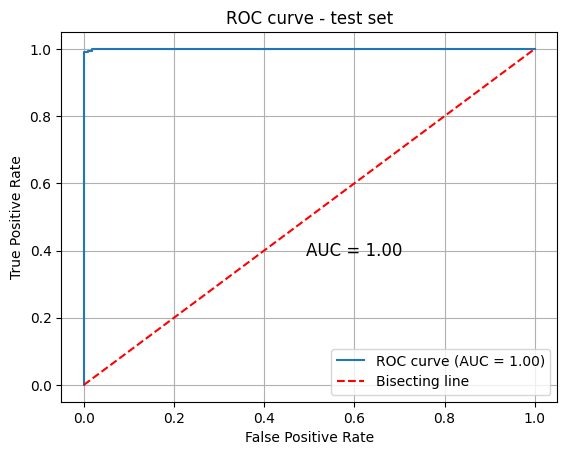

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf is your classifier, X_test is your test data, and y_test is your test labels
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, regression.predict_proba(X_test)[:, 1])

# Calcul de l'AUC
auc = roc_auc_score(y_test, regression.predict_proba(X_test)[:, 1])

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')

# Tracer la bissectrice en rouge
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Bisecting line')

# Ajout des indicateurs
plt.text(0.6, 0.4, f'AUC = {auc:.2f}', fontsize=12, ha='center', va='center')

# Personnalisation du graphique
plt.grid()
plt.title("ROC curve - test set")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


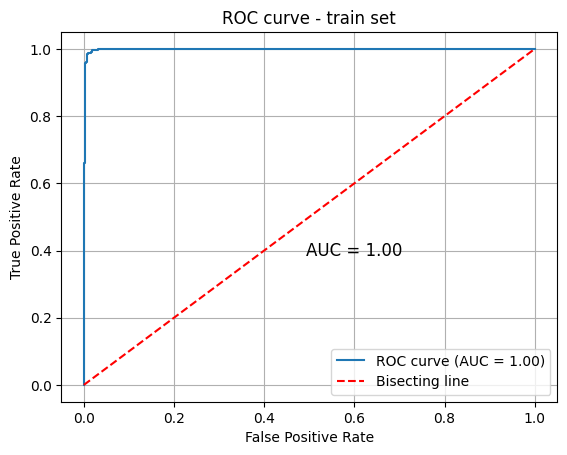

In [136]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf is your classifier, X_test is your test data, and y_test is your test labels
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, regression.predict_proba(X_train)[:, 1])

# Calcul de l'AUC
auc = roc_auc_score(y_train, regression.predict_proba(X_train)[:, 1])

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')

# Tracer la bissectrice en rouge
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Bisecting line')

# Ajout des indicateurs
plt.text(0.6, 0.4, f'AUC = {auc:.2f}', fontsize=12, ha='center', va='center')

# Personnalisation du graphique
plt.grid()
plt.title("ROC curve - train set")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#### <font color="deepskyblue">4.9 Variables les plus significatives</font>

In [92]:
from sklearn.feature_selection import RFECV

# Recursive Feature Elimination

sel = RFECV(estimator = regression, cv=10, scoring = 'accuracy')
sel.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [93]:
cv_res = pd.DataFrame(sel.cv_results_)
cv_res

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,0.958333,0.014907,0.966667,0.958333,0.966667,0.975,0.925000,0.975000,0.966667,0.950000,0.958333,0.941667
1,0.984167,0.005833,0.991667,0.983333,0.991667,0.975,0.983333,0.983333,0.991667,0.975000,0.983333,0.983333
2,0.988333,0.007638,1.000000,0.983333,0.975000,1.000,0.983333,0.983333,0.983333,0.991667,0.991667,0.991667
3,0.990000,0.006236,1.000000,0.983333,0.983333,1.000,0.983333,0.991667,0.983333,0.991667,0.991667,0.991667
4,0.990000,0.008165,1.000000,0.975000,0.983333,1.000,0.983333,0.991667,0.983333,0.991667,1.000000,0.991667
5,0.990000,0.008165,1.000000,0.975000,0.983333,1.000,0.983333,0.991667,0.983333,0.991667,1.000000,0.991667


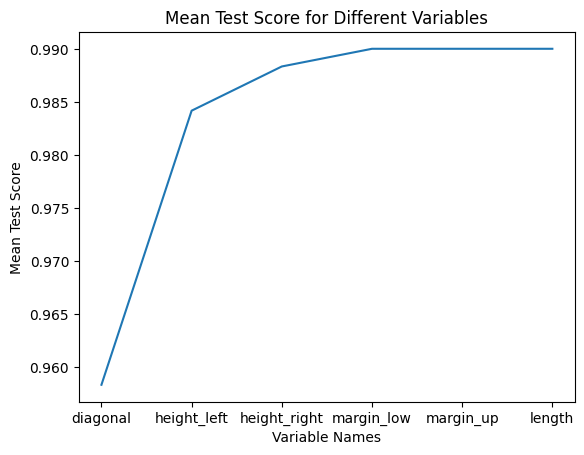

In [94]:
variable_names = banknote.tolist()  # Convert the index object to a list

# Plotting
plt.plot(np.arange(1, 7, 1), cv_res['mean_test_score'])
plt.xticks(np.arange(1, 7, 1), variable_names)  # Set the x-axis ticks to the variable names
plt.xlabel('Variable Names')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score for Different Variables')
plt.show()


In [95]:
print(sel.n_features_)

4


- Sur 6 variables, 4 d'entre elles sont significatives : length, margin_up, margin_low, height_right
  
- Nous décidons de retirer les variables les moins significatives : diagonale et height_left pour optimisation des performances de notre modèle !

#### Rappel de nos résultats avec Régression Logistique "classique"

In [96]:
from sklearn.metrics import classification_report, accuracy_score, r2_score

In [97]:
copy_df = df_final.drop(columns={'diagonal', 'height_left'})
copy_df.head()

,is_genuine,height_right,margin_low,margin_up,length
0,True,104.95,4.52,2.89,112.83
1,True,103.66,3.77,2.99,113.09
2,True,103.50,4.40,2.94,113.16
3,True,103.94,3.62,3.01,113.51
4,True,103.46,4.04,3.48,112.54


In [98]:
# Séparer les caractéristiques (features) et la variable cible (target)
X = copy_df.drop(columns='is_genuine')
y = copy_df['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le standardiseur
scaler = StandardScaler()

# Ajuster le standardiseur sur l'ensemble d'entraînement et transformer les données
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle de régression logistique
log_reg = LogisticRegression()

# Entraîner le modèle sur les données standardisées
log_reg.fit(X_train_scaled, y_train)

# Prédire les étiquettes pour l'ensemble de test
y_pred = log_reg.predict(X_test_scaled)

# Fonction pour afficher les scores et le rapport des performances
def display_scores(model, X_train, X_test, y_train, y_test, y_pred):
    # Précision (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Rapport de classification
    class_report = classification_report(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# Appeler la fonction pour afficher les scores et le rapport des performances
display_scores(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, y_pred)


Accuracy: 0.99
Confusion Matrix:
[[107   3]
 [  0 190]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<font color="coral">

- La régression logistique sans optimisation des hyper-paramètres donne un taux de faux négatifs de zero (0/190) mais un taux de faux positifs de 2.73% (3/110). 

- Tentative : nous allons donc essayer d'optimiser les hyper-paramètres afin de faire diminuer ce taux sans compromettre le taux de faux négatifs dans la mesure du possible (il s'agit en effet d'une erreur "moins grave" sur laquelle une tolérance peut être admise).
  
</font>

# <font color="deepskyblue">5 - Optimisation de la regression logistique avec GridSearchCV</font>

The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘newton-cholesky’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

Note ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

##### Nous établissons donc 3 groupes d'hyper-paramètres pour tester le modèle avec les différents algorithmes de regression logistique offerts par Scikit-Learn, tous les solveurs n'acceptant pas les mêmes pénalités en entrée.

In [99]:
# Séparer les caractéristiques (X) et la variable cible (y)
X = copy_df.drop(columns='is_genuine')
y = copy_df['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le standardiseur
scaler = StandardScaler()

# Ajuster le standardiseur sur l'ensemble d'entraînement et transformer les données
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle de régression logistique
estimator = LogisticRegression()

# Définir les paramètres pour la recherche
params_nsag = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'random_state': [42],
    'class_weight': [None, 'balanced'],
    'max_iter': [500]
}

params_liblin = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'random_state': [42],
    'class_weight': [None, 'balanced'],
    'max_iter': [500]
}

params_saga = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'],
    'random_state': [42],
    'class_weight': [None, 'balanced'],
    'max_iter': [500],
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1]
}

# Fusionner tous les paramètres dans une liste
param_grid = [params_nsag, params_liblin, params_saga]

# Configurer la recherche par grille
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Exécuter la recherche par grille
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Utiliser les meilleurs paramètres pour entraîner le modèle final
best_estimator = grid_search.best_estimator_

# Prédire les étiquettes pour l'ensemble de test
y_pred = best_estimator.predict(X_test_scaled)

# Fonction pour afficher les scores et le rapport des performances
def display_scores(model, X_test, y_test, y_pred):
    # Précision (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Rapport de classification
    class_report = classification_report(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# Appeler la fonction pour afficher les scores et le rapport des performances
display_scores(best_estimator, X_test_scaled, y_test, y_pred)


Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best parameters found:  {'C': 1.0, 'class_weight': 'balanced', 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Accuracy: 0.9966666666666667
Confusion Matrix:
[[109   1]
 [  0 190]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       110
        True       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


#### <font color="lightgreen">Interprétation des résultats (uniquement avec les variables significatives)
Le meilleur modèle trouvé est celui avec les paramètres du solveur saga. Il est extrêmement performant avec une précision globale de près de 100%. Les métriques de précision, de rappel et de score F1 sont toutes très élevées pour les deux classes (True et False), indiquant que le modèle est capable de prédire les billets avec une grande précision.

</font>

Meilleurs Paramètres :

C: 1.0

class_weight: 'balanced'

l1_ratio: 0

max_iter: 500

penalty: 'l1'

random_state: 42

solver: 'saga'

#### <font color="lightgreen">Nous l'avons amélioré ! 1 faux positif avec GridSearch paramétré sur solveur saga contre 3 faux positifs avec une régression logistique sans hyper-paramètres.</font>

##### <font color="orange">Nous poursuivrons donc l'analyse ici avec le modele saga en application des recommandations de la documentation de scikit-learn et en raison d'une efficacité computationelle plus grande (convergence plus rapide sur des donnees centrees-reduites).</font>

# <font color="deepskyblue">6 - Regression Logistique finale</font>

Sélection du meilleur paramètre pour notre régression logistique

In [100]:
# Initialiser le modèle de régression logistique avec les meilleurs paramètres
best_params_saga = {'C': 1.0, 'class_weight': 'balanced', 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
estimator_final = LogisticRegression(**best_params_saga)
# Entraîner le modèle sur les données standardisées
estimator_final.fit(X_train_scaled, y_train)

# Vérifier les performances sur les données de test
y_pred = estimator_final.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9966666666666667


C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


<font color="deepskyblue"> 

# 7. Prédiction sur fichier production

</font>

In [101]:
# Import data
data_prod = pd.read_csv("billets_production.csv", encoding='latin_1')

# check for missing values
if (data_prod.loc[data_prod.isna().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs manquantes !!!")
else:
    print ("Pas de valeurs manquantes.")
# check for missing data
if (data_prod.loc[data_prod.isnull().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs nulles !!! ")
else:
    print ("Pas de valeurs nulles.")
# check for duplicates
if (data_prod.loc[data_prod.duplicated() == True].shape[0]) != 0:
    print("!!! Doublons dans la table !!!")
else:
    print ("Pas de doublons dans la table.")

Pas de valeurs manquantes.
Pas de valeurs nulles.
Pas de doublons dans la table.


In [102]:
# use if running model with significant variables only
X = data_prod[['height_right', 'margin_low', 'margin_up', 'length']]

X_scaled = scaler.transform(X)
banknotes_prod = data_prod['id']
X

,height_right,margin_low,margin_up,length
0,103.54,5.21,3.30,111.42
1,104.13,6.00,3.31,112.09
2,104.29,4.99,3.39,111.57
3,104.34,4.44,3.03,113.20
4,103.56,3.77,3.16,113.33


In [103]:
# predict banknote type
data_prod['proba'] = estimator_final.predict_proba(X_scaled)[:, 1]
data_prod.loc[data_prod['proba'] > 0.5, 'labels_pred_reglog'] = True
data_prod.loc[data_prod['proba'] <= 0.5, 'labels_pred_reglog'] = False
data_prod.to_csv('data_prod.csv', index=False, encoding='latin_1')
data_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba,labels_pred_reglog
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.000295,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.000049,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.000110,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.982676,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.999840,True


In [104]:
# print results
print("Resultats:\n")
for k, l in zip(data_prod["labels_pred_reglog"], data_prod["id"]):
    if k == 1:
        print(f"Le billet ref. {l} est un vrai billet.")
    else:
        print(f"Le billet ref. {l} est un faux billet.")

Resultats:

Le billet ref. A_1 est un faux billet.
Le billet ref. A_2 est un faux billet.
Le billet ref. A_3 est un faux billet.
Le billet ref. A_4 est un vrai billet.
Le billet ref. A_5 est un vrai billet.


**********************************************************************

** end **